In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from direction_field_helper import draw_direction_field

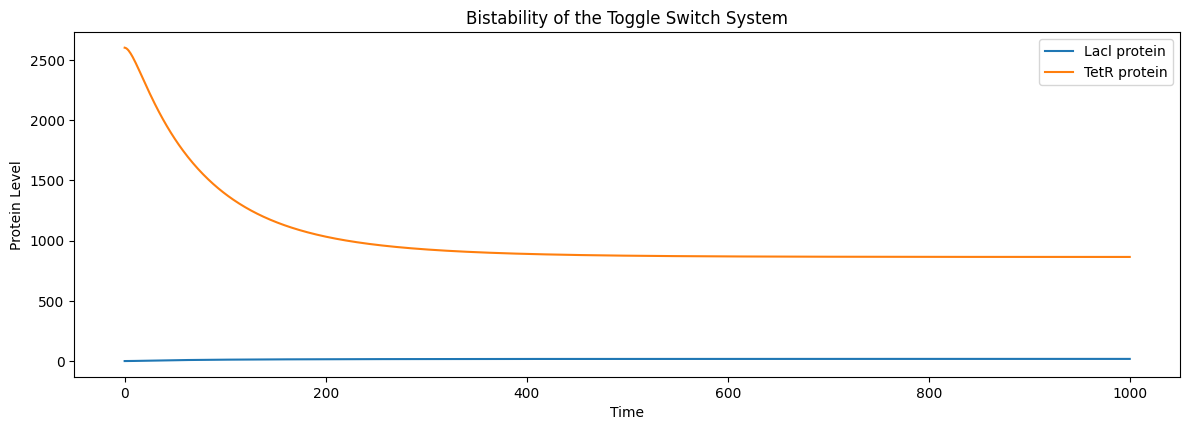

In [2]:
def sdot2(s,t,params):
    ML, PL, MT, PT = s
    km0L, kmL, KL, nL, kdmL, kpL, kdpL, km0T, kmT, KT, nT, kdmT, kpT, kdpT = params

    rate_ML_prod = km0L + kmL*(KT**nT/(PT**nT+KT**nT))
    rate_ML_loss = kdmL*ML

    rate_PL_prod =  kpL*ML
    rate_PL_loss =  kdpL*PL

    rate_MT_prod = km0T + kmT*(KL**nL/(PL**nL+KL**nL))
    rate_MT_loss = kdmT*MT

    rate_PT_prod = kpT*MT
    rate_PT_loss = kdpT*PT
        
    dML = rate_ML_prod - rate_ML_loss
    dPL = rate_PL_prod - rate_PL_loss
    
    dMT = rate_MT_prod - rate_MT_loss
    dPT = rate_PT_prod - rate_PT_loss
    
    ds = [dML, dPL, dMT, dPT]
    return ds

# define parameter values
km0L = 0.032
kmL = 8.3
KL = 31.94
nL = 2
kdmL = 0.1386 
kpL = 0.9726
kdpL = 0.0165

km0T = 0.119
kmT = 2.06
KT = 30
nT = 2
kdmT = 0.1386 
kpT = 1.170
kdpT = 0.0165

params = [km0L, kmL, KL, nL, kdmL, kpL, kdpL,
          km0T, kmT, KT, nT, kdmT, kpT, kdpT]

# define initial conditions
ML0 = 0
PL0 = 0
MT0 = 36
PT0 = 2600

s0 = [ML0, PL0, MT0, PT0]

# define time observation points
t_start = 0
t_end = 1000

t_obs = np.arange(t_start, t_end+0.1, 1)

# run simulation
s_obs = odeint(sdot2, s0, t_obs, args=(params,))

# extract the observations
ML_obs = s_obs[:,0]
PL_obs0 = s_obs[:,1]
MT_obs = s_obs[:,2]
PT_obs0 = s_obs[:,3]

plt.figure(figsize=(12, 8))

# Plot protein levels
plt.subplot(2, 1, 2)
plt.plot(t_obs, PL_obs0, label = "Lacl protein")
plt.plot(t_obs, PT_obs0, label = "TetR protein")

plt.xlabel('Time')
plt.ylabel('Protein Level')
plt.title('Bistability of the Toggle Switch System')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
s0_1 = [ 1000 , 2600 ]
s0_2 = [ 2600 , 1000]
s0_3 = [ 500 , 200]
s0_4 = [ 200 , 500] 

s0_vals =  [ s0_1, s0_2, s0_3, s0_4 ]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

for s0 in s0_vals:
    # run simulation with init condition
    t_start = 0
    t_end = 10000
    t_obs = np.arange(t_start, t_end + 0.1, 1)
    s_obs = odeint(sdot3, s0, t_obs, args=(params,))

    # extract results
    PL_obs = s_obs[:,0]
    PT_obs = s_obs[:,1]

    # plot on phase plot
    ax.plot(PT_obs, PL_obs)
    
ax.set_ylim(0,3000)
ax.set_xlim(0,3000)

draw_direction_field(ax,sdot3,params,normalise=True )

# add code to calculate and draw nullclines below:
PL_nullcline_PT_vals = np.arange(0,3000,1)
PL_nullcline_PL_vals = []

for PT in PL_nullcline_PT_vals:
    PL =  
    PL_nullcline_PL_vals.append(PL)

ax.plot(PL_nullcline_PL_vals, PL_nullcline_PT_vals, "r:")
ax.set_xlabel("PT")
ax.set_ylabel("PL")
ax.set_title("Phase Plot showing Toggle Switch system behaviour with n=2")
plt.show()

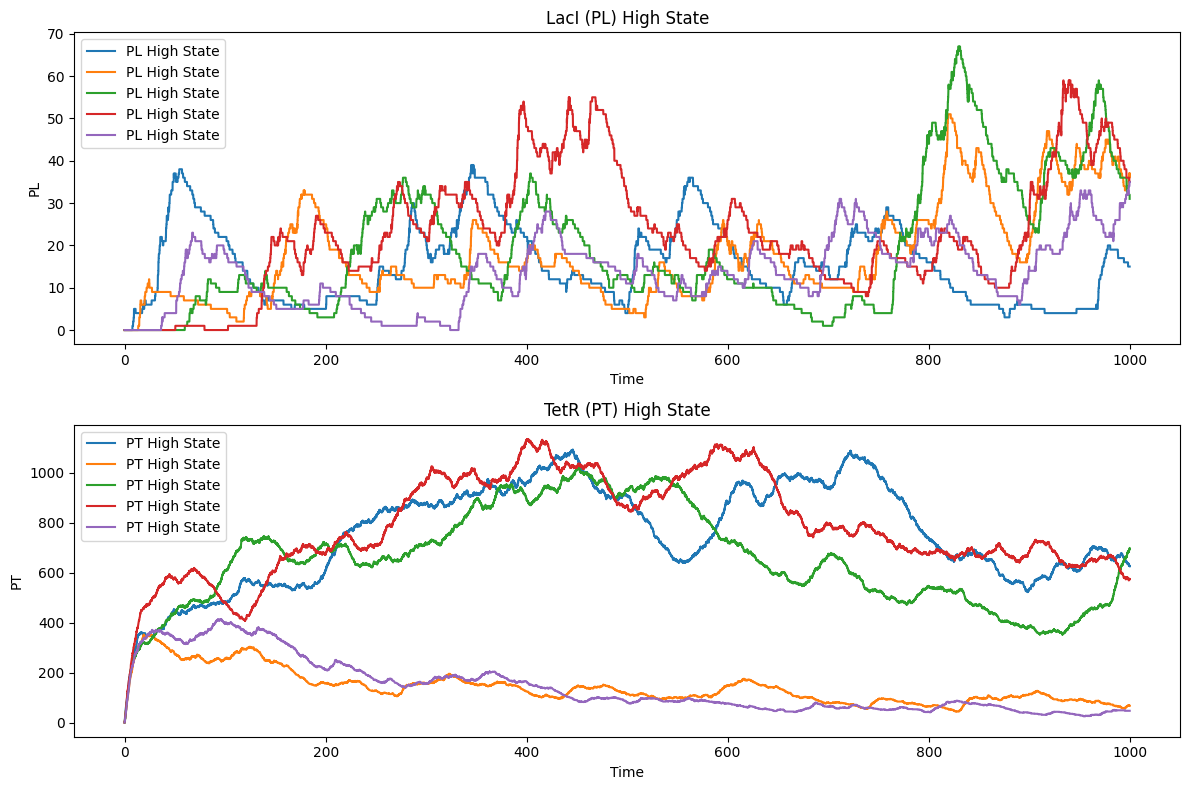

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gillespie_toggle_switch(params, s0, t_end):
    ML, PL, MT, PT = s0
    times = [0]
    states = [s0]

    while times[-1] < t_end:
        rates = calculate_rates(ML, PL, MT, PT, params)
        total_rate = sum(rates)
        
        if total_rate == 0:
            break
        
        dt = np.random.exponential(1 / total_rate)
        event = np.random.choice(len(rates), p=[r / total_rate for r in rates])

        if event == 0:
            ML += 1  # ML production event
        elif event == 1:
            ML -= 1  # ML degradation event
        elif event == 2:
            PL += 1  # PL production event
        elif event == 3:
            PL -= 1  # PL degradation event
        elif event == 4:
            MT += 1  # MT production event
        elif event == 5:
            MT -= 1  # MT degradation event
        elif event == 6:
            PT += 1  # PT production event
        elif event == 7:
            PT -= 1  # PT degradation event

        times.append(times[-1] + dt)
        states.append([ML, PL, MT, PT])

    return np.array(times), np.array(states)

def calculate_rates(ML, PL, MT, PT, params):
    km0L, kmL, KL, nL, kdmL, kpL, kdpL, km0T, kmT, KT, nT, kdmT, kpT, kdpT = params

    rate_ML_prod = km0L + kmL * (KT**nT / (PT**nT + KT**nT))
    rate_ML_loss = kdmL * ML

    rate_PL_prod = kpL * ML
    rate_PL_loss = kdpL * PL

    rate_MT_prod = km0T + kmT * (KL**nL / (PL**nL + KL**nL))
    rate_MT_loss = kdmT * MT

    rate_PT_prod = kpT * MT
    rate_PT_loss = kdpT * PT

    return [rate_ML_prod, rate_ML_loss, rate_PL_prod, rate_PL_loss,
            rate_MT_prod, rate_MT_loss, rate_PT_prod, rate_PT_loss]

# Define parameter values
km0L = 0.032
kmL = 8.3
KL = 31.94
nL = 2
kdmL = 0.1386 
kpL = 0.9726
kdpL = 0.0165

km0T = 0.119
kmT = 2.06
KT = 30
nT = 2
kdmT = 0.1386 
kpT = 1.170
kdpT = 0.0165

params = [km0L, kmL, KL, nL, kdmL, kpL, kdpL,
          km0T, kmT, KT, nT, kdmT, kpT, kdpT]

# Define initial conditions
ML0 = 0
PL0 = 0
MT0 = 36
PT0 = 2600

s0 = [ML0, PL0, MT0, PT0]

# Set simulation time
t_end = 1000

# Run multiple stochastic simulations
num_simulations = 5  # Number of simulations to run for each state

# LacI (PL) high state
PL_high_states = []
for _ in range(num_simulations):
    times, states = gillespie_toggle_switch(params, s0, t_end)
    PL_high_states.append((times, states))

# TetR (PT) high state
PT_high_states = []
for _ in range(num_simulations):
    s0 = [ML0, PL0, MT0, 0]  # Set initial state with high TetR (PT)
    times, states = gillespie_toggle_switch(params, s0, t_end)
    PT_high_states.append((times, states))

# Plotting
plt.figure(figsize=(12, 8))

# LacI (PL) high state plots
plt.subplot(2, 1, 1)
for times, states in PL_high_states:
    plt.plot(times, states[:, 1], label='PL High State')
plt.xlabel('Time')
plt.ylabel('PL')
plt.title('LacI (PL) High State')
plt.legend()

# TetR (PT) high state plots
plt.subplot(2, 1, 2)
for times, states in PT_high_states:
    plt.plot(times, states[:, 3], label='PT High State')
plt.xlabel('Time')
plt.ylabel('PT')
plt.title('TetR (PT) High State')
plt.legend()

plt.tight_layout()
plt.show()


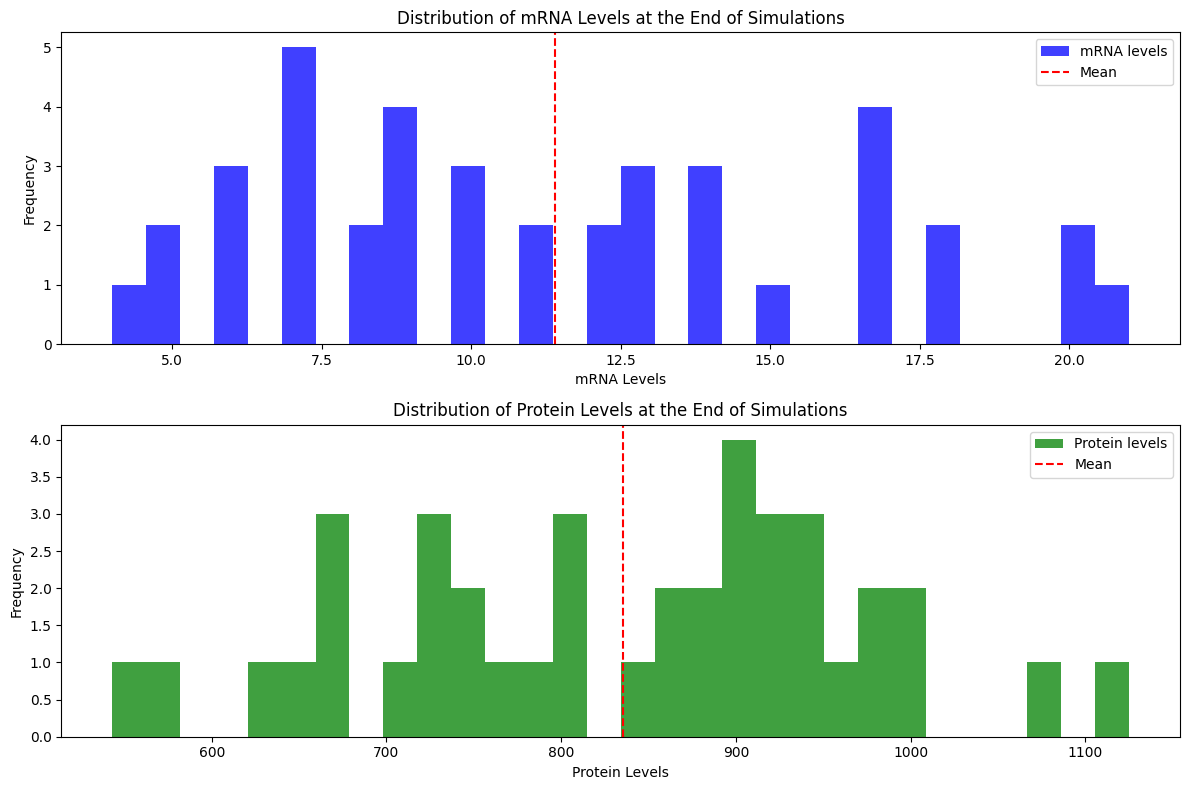

mRNA levels - Mean: 11.4 Standard Deviation: 4.657252408878008
Protein levels - Mean: 835.6 Standard Deviation: 134.92716553755957


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gillespie_toggle_switch(params, s0, t_end):
    ML, PL, MT, PT = s0
    time = 0
    
    while time < t_end:
        rates = calculate_rates(ML, PL, MT, PT, params)
        total_rate = sum(rates)
        
        if total_rate == 0:
            break
        
        dt = np.random.exponential(1 / total_rate)
        event = np.random.choice(len(rates), p=[r / total_rate for r in rates])

        if event == 0:
            ML += 1  # ML production event
        elif event == 1:
            ML -= 1  # ML degradation event
        elif event == 2:
            PL += 1  # PL production event
        elif event == 3:
            PL -= 1  # PL degradation event
        elif event == 4:
            MT += 1  # MT production event
        elif event == 5:
            MT -= 1  # MT degradation event
        elif event == 6:
            PT += 1  # PT production event
        elif event == 7:
            PT -= 1  # PT degradation event
        
        time += dt

    return ML, PL, MT, PT

def calculate_rates(ML, PL, MT, PT, params):
    km0L, kmL, KL, nL, kdmL, kpL, kdpL, km0T, kmT, KT, nT, kdmT, kpT, kdpT = params

    rate_ML_prod = km0L + kmL * (KT**nT / (PT**nT + KT**nT))
    rate_ML_loss = kdmL * ML

    rate_PL_prod = kpL * ML
    rate_PL_loss = kdpL * PL

    rate_MT_prod = km0T + kmT * (KL**nL / (PL**nL + KL**nL))
    rate_MT_loss = kdmT * MT

    rate_PT_prod = kpT * MT
    rate_PT_loss = kdpT * PT

    return [rate_ML_prod, rate_ML_loss, rate_PL_prod, rate_PL_loss,
            rate_MT_prod, rate_MT_loss, rate_PT_prod, rate_PT_loss]

# Define parameter values
km0L = 0.032
kmL = 8.3
KL = 31.94
nL = 2
kdmL = 0.1386 
kpL = 0.9726
kdpL = 0.0165

km0T = 0.119
kmT = 2.06
KT = 30
nT = 2
kdmT = 0.1386 
kpT = 1.170
kdpT = 0.0165

params = [km0L, kmL, KL, nL, kdmL, kpL, kdpL,
          km0T, kmT, KT, nT, kdmT, kpT, kdpT]

# Set simulation time
t_end = 1000

# Number of simulations
num_simulations = 20

# Arrays to store final states
mRNA_levels = []
protein_levels = []

# Run simulations starting from LacI (PL) high state
initial_state_PL_high = [0, 100, 36, 2600]  # LacI high state
for _ in range(num_simulations):
    final_state = gillespie_toggle_switch(params, initial_state_PL_high, t_end)
    mRNA_levels.append(final_state[0] + final_state[2])  # Total mRNA (ML + MT)
    protein_levels.append(final_state[1] + final_state[3])  # Total protein (PL + PT)

# Run simulations starting from TetR (PT) high state
initial_state_PT_high = [0, 0, 36, 2600]  # TetR high state
for _ in range(num_simulations):
    final_state = gillespie_toggle_switch(params, initial_state_PT_high, t_end)
    mRNA_levels.append(final_state[0] + final_state[2])  # Total mRNA (ML + MT)
    protein_levels.append(final_state[1] + final_state[3])  # Total protein (PL + PT)

# Convert lists to numpy arrays for histogram plotting
mRNA_levels = np.array(mRNA_levels)
protein_levels = np.array(protein_levels)

# Plot histograms of mRNA and protein levels
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(mRNA_levels, bins=30, alpha=0.75, color='b', label='mRNA levels')
plt.axvline(np.mean(mRNA_levels), color='r', linestyle='dashed', linewidth=1.5, label='Mean')
plt.xlabel('mRNA Levels')
plt.ylabel('Frequency')
plt.title('Distribution of mRNA Levels at the End of Simulations')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(protein_levels, bins=30, alpha=0.75, color='g', label='Protein levels')
plt.axvline(np.mean(protein_levels), color='r', linestyle='dashed', linewidth=1.5, label='Mean')
plt.xlabel('Protein Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Protein Levels at the End of Simulations')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("mRNA levels - Mean:", np.mean(mRNA_levels), "Standard Deviation:", np.std(mRNA_levels))
print("Protein levels - Mean:", np.mean(protein_levels), "Standard Deviation:", np.std(protein_levels))
